You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

Perform an appropriate hypothesis test to determine the p-value, and hence result, of whether to reject or fail to reject the null hypothesis that the mean number of goals scored in women's international soccer matches is the same as men's. Use a 10% significance level.

For this analysis, you'll use Official FIFA World Cup matches since 2002-01-01, and you'll also assume that each match is fully independent, i.e., team form is ignored.

# Import Libraries and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pingouin

#Load men games
men_results = pd.read_csv('men_results.csv')
men_results.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [2]:
#Load women games
women_results = pd.read_csv('women_results.csv')
women_results.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


# Check & Convert Data Types

In [3]:
print(men_results.info())
print(women_results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int

In [4]:
men_results['date'] = pd.to_datetime(men_results['date'])
women_results['date'] = pd.to_datetime(women_results['date'])

print(men_results['date'].dtype)
print(women_results['date'].dtype)

datetime64[ns]
datetime64[ns]


# Extract Dataframe for Games in World Cup after 2002

In [5]:
men_WC_19thCentury = men_results[(men_results['date'].dt.year >= 2002) & (men_results['tournament'] == 'FIFA World Cup')]
men_WC_19thCentury.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


In [6]:
women_WC_19thCentury = women_results[(women_results['date'].dt.year >= 2002) & (women_results['tournament'] == 'FIFA World Cup')]
women_WC_19thCentury.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


# Add `total_goal` Column

In [8]:
men_WC_19thCentury.loc[:, 'total_goal'] = men_WC_19thCentury['home_score'] + men_WC_19thCentury['away_score']
men_WC_19thCentury.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_goal
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1


In [10]:
women_WC_19thCentury.loc[:, 'total_goal'] = women_WC_19thCentury['home_score'] + women_WC_19thCentury['away_score']
women_WC_19thCentury.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_goal
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4


# Check `tota_goal` Distribution

**The distribution is plotted to see whether it is normal.**

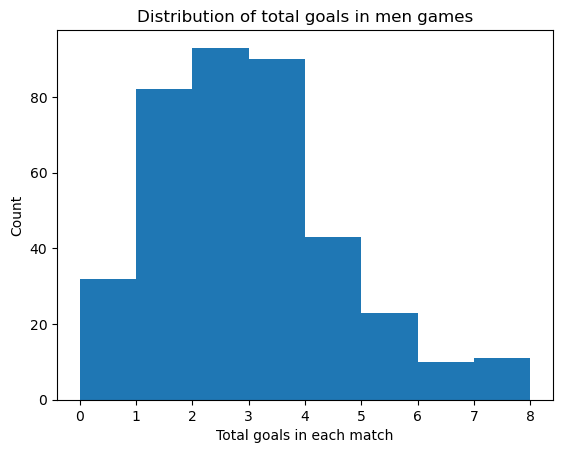

In [11]:
plt.hist(data=men_WC_19thCentury, x='total_goal', bins=8)
plt.title('Distribution of total goals in men games')
plt.xlabel('Total goals in each match')
plt.ylabel('Count')
plt.show()

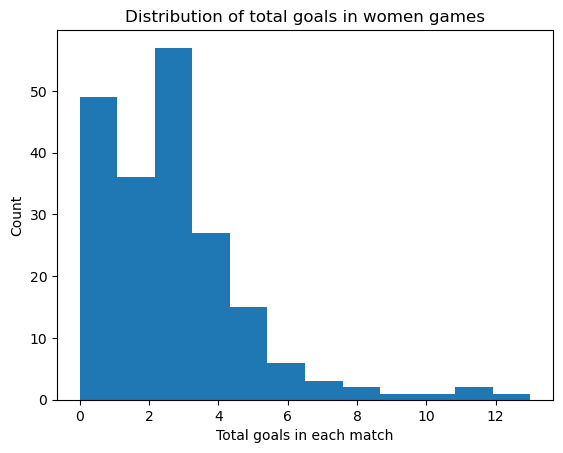

In [12]:
plt.hist(data=women_WC_19thCentury, x='total_goal', bins=12)
plt.title('Distribution of total goals in women games')
plt.xlabel('Total goals in each match')
plt.ylabel('Count')
plt.show()

**As non of the histogram plot are normal, and also because `total_goal` is independent for men and women games we can go with Mann-Whitney U non-paramteric test**

# Mann-Whitney U Test

In [13]:
mwu_stat = pingouin.mwu(x=women_WC_19thCentury['total_goal'], y=men_WC_19thCentury['total_goal'], alternative='greater')
mwu_stat

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,0.126901,0.563451


In [14]:
result_dict = {"p_val": mwu_stat.loc['MWU', 'p-val'],
               "result": 'reject' if mwu_stat.loc['MWU', 'p-val'] < 0.1 else 'fail to reject'}
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}